<div style="background: #000000;
            color:#AEC6CF;
            font-weight: bold;
            padding: 20px 40px;
            border-radius: 20px;
            text-align: center;
            font-size: 40px;
            border: 4px solid #AEC6CF>
 Retail Sales 
</div>


<div style="background-color: #000000;
            color: #1E90FF;
            font-weight: bold;
            padding: 22px;
            border-radius: 30px;
            text-align: center;
            font-size: 38px;
            border: 4px ridge #1E90FF;">
RETAIL SALES
</div>


<div style="background-color: #000000;
            color: #7CFC00;
            font-weight: bold;
            padding: 13px;
            border-radius: 30px;
            text-align: center;
            font-size: 28px;
            border: 4px groove #7CFC00;">
 IMPORT LIBRARIES, STATISTICAL METHODS, ALGORITHMS, AND METRICS
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import stats,f,chi2_contingency,spearmanr,pearsonr,ttest_ind
from statsmodels.stats.weightstats import ztest

<div style="background-color: #000000;
            color: #7CFC00;
            font-weight: bold;
            padding: 13px;
            border-radius: 30px;
            text-align: center;
            font-size: 28px;
            border: 4px groove #7CFC00;">
LOAD THE DATASET
</div>


In [2]:
df=pd.read_csv(r"C:\Users\muhammed shabab\Downloads\retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


<div style="background-color: #000000;
            color: #7CFC00;
            font-weight: bold;
            padding: 13px;
            border-radius: 30px;
            text-align: center;
            font-size: 28px;
            border: 4px groove #7CFC00;">
 CHECKING SHAPE,COLUMNS,DESCRIBE,INFO,UNIQUE
</div>


In [3]:
df.shape

(1000, 9)

In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
for x in df:
    print([x])
    print(df[x].unique())
    print(df[x].nunique())

['Transaction ID']
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  1

<div style="background-color: #000000;
            color: #7CFC00;
            font-weight: bold;
            padding: 13px;
            border-radius: 30px;
            text-align: center;
            font-size: 28px;
            border: 4px groove #7CFC00;">
 DATA PREPROCESSING
</div>


<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
MISSING VALUES HANDLING
</div>


In [8]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df.drop(columns=['Transaction ID', 'Date','Customer ID'], inplace=True)

<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
OUTLIER DETECTION
</div>

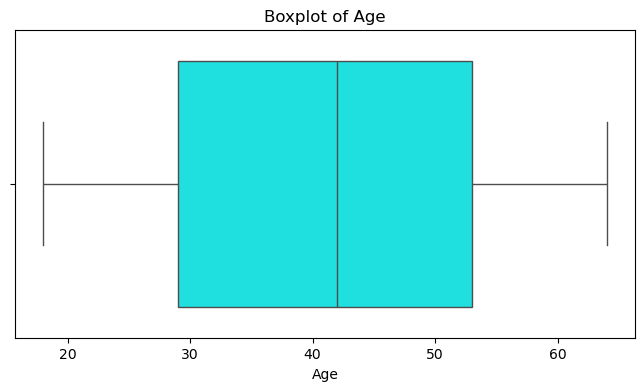

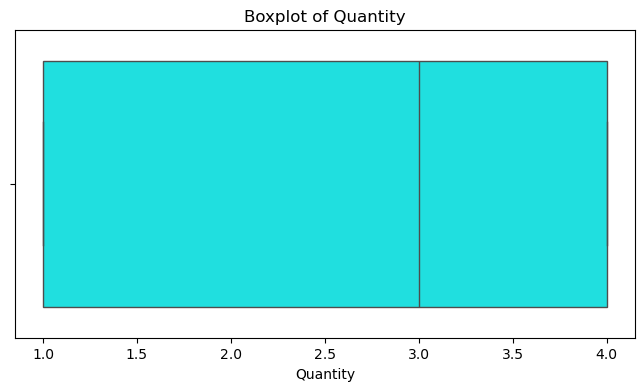

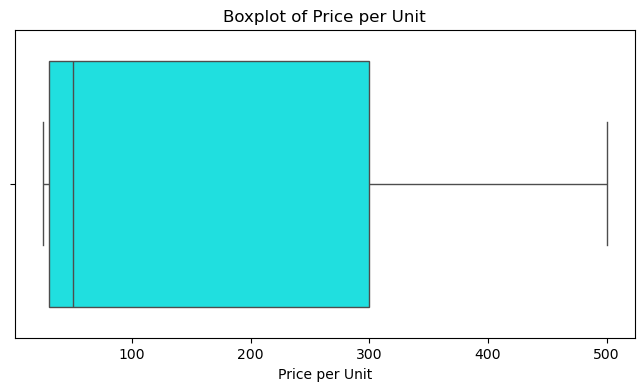

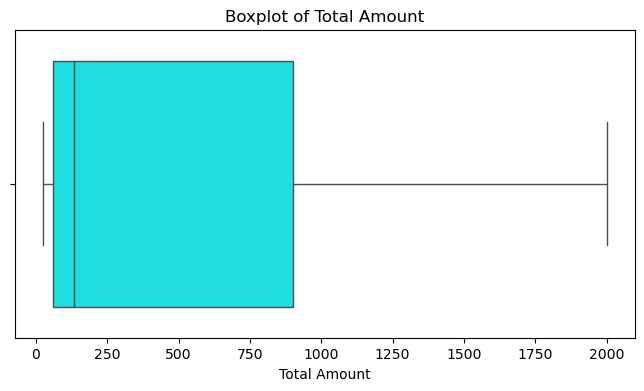

In [10]:
num_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount',]
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col],color='cyan')
    plt.title(f'Boxplot of {col}')
    plt.show()

<div style="background-color: #000000;
            color: #7CFC00;
            font-weight: bold;
            padding: 13px;
            border-radius: 30px;
            text-align: center;
            font-size: 28px;
            border: 4px groove #7CFC00;">
 STATISTICAL ANALYSIS
</div>



<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 8px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
Z-TEST 
</div>

##### H₀: There is no significant difference in mean Total Amount between genders.
##### H₁:There is a significant difference in mean Total Amount between genders.

In [11]:
male_sales = df[df['Gender'] == 'Male']['Total Amount']
female_sales = df[df['Gender'] == 'Female']['Total Amount']

In [12]:
z_stat, p_val = ztest(male_sales, female_sales)

In [13]:
alpha = 0.05
if p_val < alpha:
    print("Reject H0: Significant difference in mean sales between genders.")
else:
    print("Fail to reject H0: No significant difference in mean sales between genders.")

Fail to reject H0: No significant difference in mean sales between genders.


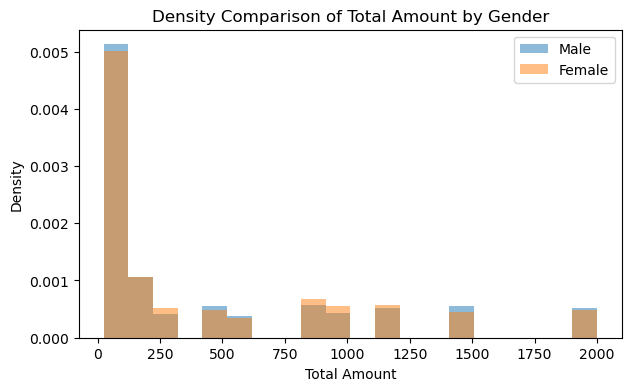

In [64]:
plt.figure(figsize=(7,4))
plt.hist(male_sales, bins=20, density=True, alpha=0.5, label='Male')
plt.hist(female_sales, bins=20, density=True, alpha=0.5, label='Female')

plt.xlabel('Total Amount')
plt.ylabel('Density')
plt.title('Density Comparison of Total Amount by Gender')
plt.legend()
plt.show()

##### The density curves for male and female customers overlap heavily.

##### Both genders show high concentration at lower total amounts.

##### Higher spending values exist for both genders but occur less frequently.

##### No clear shift or separation between the two distributions is visible.

##### This supports the conclusion of no significant difference in total amount by gender.

<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
 T-Test 
</div>

<div style="background-color: #000000;
            color: #BF00FF;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #BF00FF;">
 Two Tailed T-Test
</div>

##### H₀: There is no significant difference in mean Sales between Male and Female customers.
##### H₁: There is a significant difference in mean Sales between Male and Female customers.

In [15]:
male_sales = df[df['Gender'] == 'Male']['Total Amount']
female_sales = df[df['Gender'] == 'Female']['Total Amount']

In [16]:
t_stat, p_val = ttest_ind(male_sales, female_sales, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -0.03159971766107415
P-value: 0.9747976108130165


In [17]:
alpha = 0.05
if p_val < alpha:
    print("Reject H0: Significant difference in mean sales between genders.")
else:
    print("Fail to reject H0: No significant difference in mean sales between genders.")

Fail to reject H0: No significant difference in mean sales between genders.


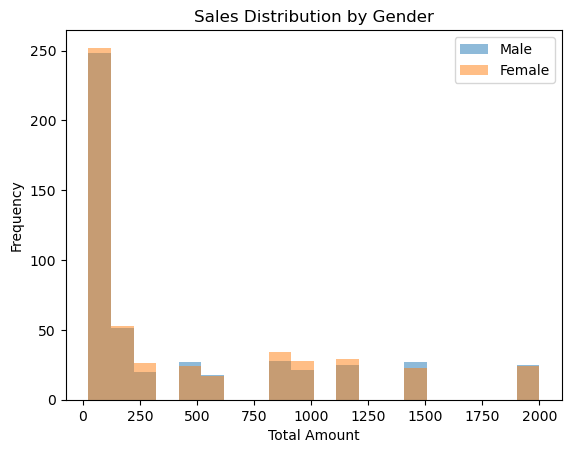

In [28]:
plt.hist(male_sales, bins=20, alpha=0.5, label='Male')
plt.hist(female_sales, bins=20, alpha=0.5, label='Female')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.title('Sales Distribution by Gender')
plt.legend()
plt.show()

##### Sales distributions for male and female customers largely overlap.

##### Both genders have more purchases at lower total amounts.

##### High-value purchases occur for both genders but are less frequent.

##### No clear shift or separation between male and female distributions is visible.

##### This visual supports the t-test result of no significant difference in mean sales between genders.

<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
 Chi-Square-Test 
</div>

In [ ]:
contingency_table = pd.crosstab(df['Total Amount'], df['Gender'])
print(contingency_table)

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

In [ ]:
alpha = 0.05

if p < alpha:
    print("Reject H0: Target and Gender are associated")
else:
    print("Fail to reject H0: No association")

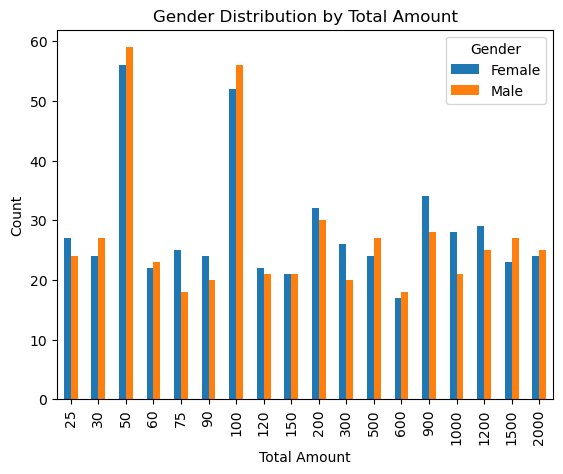

In [29]:
contingency_table = pd.crosstab(df['Total Amount'], df['Gender'])
contingency_table.plot(kind='bar')

plt.title('Gender Distribution by Total Amount')
plt.ylabel('Count')
plt.xlabel('Total Amount')
plt.show()

##### Male and female counts are very similar across all total amount levels.

##### No consistent category shows a strong dominance of one gender.

##### Both genders follow a similar purchasing pattern across spending amounts.

##### Small differences appear at some amounts but are not systematic.

##### This visual supports the chi-square result of no significant association between gender and total amount.

<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
 Anova-Test
</div>

In [34]:
anova_data = df[['Product Category', 'Price per Unit']]

In [35]:
anova_data

,Product Category,Price per Unit
0,Beauty,50
1,Clothing,500
2,Electronics,30
3,Clothing,500
4,Beauty,50
...,...,...
995,Clothing,50
996,Beauty,30
997,Beauty,25
998,Electronics,50


In [36]:
groups = anova_data.groupby('Product Category')['Price per Unit'].apply(list)
groups

Product Category
Beauty         [50, 50, 30, 25, 500, 50, 25, 500, 300, 30, 30...
Clothing       [500, 500, 25, 50, 50, 30, 500, 25, 25, 300, 5...
Electronics    [30, 25, 300, 500, 500, 25, 500, 30, 300, 50, ...
Name: Price per Unit, dtype: object

In [37]:
f_stat, p_val = stats.f_oneway(*groups)
print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 0.24595622172568438
P-value: 0.7820038890932299


C:\Users\muhammed shabab\AppData\Local\Temp\ipykernel_17504\3111142394.py:1: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_stat, p_val = stats.f_oneway(*groups)


In [38]:
alpha = 0.05

if p_val < alpha:
    print("Reject H0: Mean Total Amount differs across product categories")
else:
    print("Fail to reject H0: No significant difference")

Fail to reject H0: No significant difference


#### p-value < 0.05 → Reject H₀ → H₁ is accepted → There is a significant difference in mean values among the groups.

#### p-value ≥ 0.05 → Fail to reject H₀ → There is no significant difference in mean values among the groups.

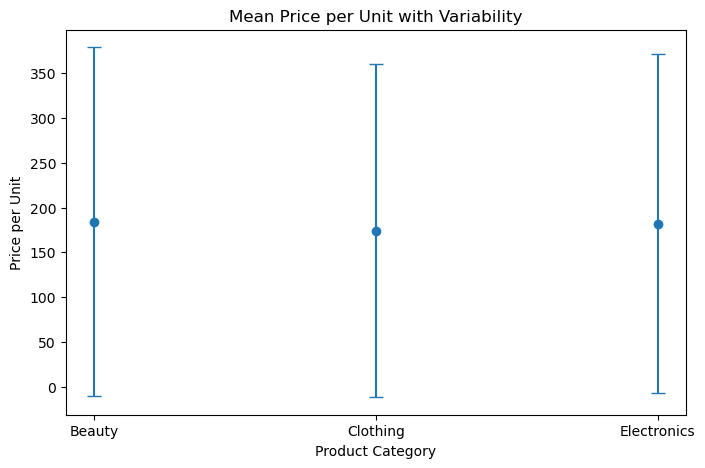

In [39]:
means = anova_data.groupby('Product Category')['Price per Unit'].mean()
stds = anova_data.groupby('Product Category')['Price per Unit'].std()

plt.figure(figsize=(8,5))
plt.errorbar(means.index, means.values, yerr=stds.values, fmt='o', capsize=5)
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.title('Mean Price per Unit with Variability')
plt.show()


#### Mean price per unit is very similar across Beauty, Clothing, and Electronics.

#### Large variability exists within each product category.

#### Error bars overlap heavily, showing no clear separation between categories.

#### Differences within categories are much larger than differences between categories.

#### This visual supports no significant difference in mean prices, consistent with ANOVA results.

<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
 Pearson-Correlation-Test
</div>

In [40]:
corr, p_value = pearsonr(df['Quantity'], df['Total Amount'])

print("Pearson Correlation:", corr)
print("p-value:", p_value)

Pearson Correlation: 0.37370705412140576
p-value: 1.6914213593093195e-34


In [41]:
if p_value < 0.05:
    print("Result: Significant linear association between Quantity and Total Amount")
else:
    print("Result: No significant linear association")

Result: Significant linear association between Quantity and Total Amount


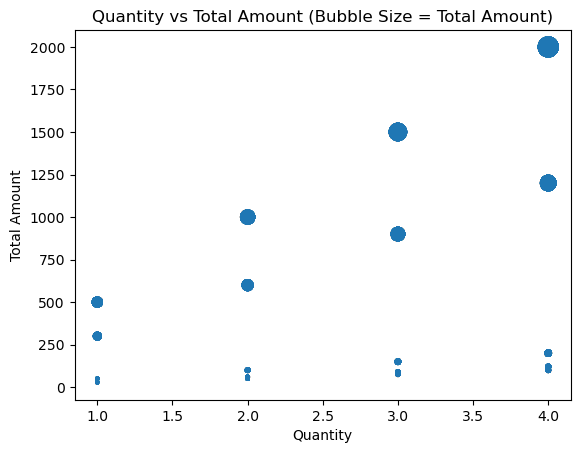

In [63]:

plt.scatter(df['Quantity'], df['Total Amount'],
            s=df['Total Amount']/10, alpha=0.5)

plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Quantity vs Total Amount (Bubble Size = Total Amount)')
plt.show()


#### As quantity increases, the total amount generally increases, indicating a positive correlation.

#### Larger bubbles at higher quantities show higher total sales values.

#### There is some variability in total amount for the same quantity (prices differ per unit).

#### The upward pattern supports the Pearson correlation result.

#### Overall, higher purchase quantities tend to lead to higher total spending.

<div style="background-color: #000000;
            color: #7CFC00;
            font-weight: bold;
            padding: 13px;
            border-radius: 30px;
            text-align: center;
            font-size: 28px;
            border: 4px groove #7CFC00;">
 MODEL BUILDING
</div>



<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
 ENCODING
</div>

In [42]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Product Category'] = le.fit_transform(df['Product Category'])

In [43]:
df

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,34,0,3,50,150
1,0,26,1,2,500,1000
2,1,50,2,1,30,30
3,1,37,1,1,500,500
4,1,30,0,2,50,100
...,...,...,...,...,...,...
995,1,62,1,1,50,50
996,1,52,0,3,30,90
997,0,23,0,4,25,100
998,0,36,2,3,50,150


<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
 SCALING
</div>

In [44]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df)
scaled

array([[ 1.02020406, -0.54056476, -1.28596236,  0.42926498, -0.68512265,
        -0.5467043 ],
       [-0.98019606, -1.12559156, -0.04348665, -0.45399629,  1.68846418,
         0.97191876],
       [ 1.02020406,  0.62948884,  1.19898906, -1.33725757, -0.7906154 ,
        -0.76109815],
       ...,
       [-0.98019606, -1.34497661, -1.28596236,  1.31252625, -0.81698859,
        -0.63603507],
       [-0.98019606, -0.39430806,  1.19898906,  0.42926498, -0.68512265,
        -0.5467043 ],
       [ 1.02020406,  0.41010379,  1.19898906,  1.31252625, -0.7906154 ,
        -0.60030276]])

In [45]:
X = df.drop("Total Amount", axis=1)
y = df["Total Amount"]

In [46]:
X

,Gender,Age,Product Category,Quantity,Price per Unit
0,1,34,0,3,50
1,0,26,1,2,500
2,1,50,2,1,30
3,1,37,1,1,500
4,1,30,0,2,50
...,...,...,...,...,...
995,1,62,1,1,50
996,1,52,0,3,30
997,0,23,0,4,25
998,0,36,2,3,50


In [47]:
y

0       150
1      1000
2        30
3       500
4       100
       ... 
995      50
996      90
997     100
998     150
999     120
Name: Total Amount, Length: 1000, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model=LinearRegression()

In [50]:
model=model.fit(X_train,y_train)

In [51]:
y_pred=model.predict(X_test)

<div style="background-color: #000000;
            color: #00CED1;
            font-weight: bold;
            padding: 13px;
            border-radius: 50px;
            text-align: center;
            font-size: 28px;
            border: 4px inset #00CED1;">
 F-Test
</div>

In [52]:
n=len(y_test)
p=X_train.shape[1]

In [53]:
RSS=np.sum((y_test-y_pred)**2)
RSS

np.float64(8376709.446887745)

In [54]:
TSS=np.sum(y_test-np.mean(y_pred)**2)
TSS

np.float64(-47571461.11386019)

In [55]:
ESS=TSS-RSS
print(ESS)

-55948170.56074794


In [56]:
MSR = ESS / p
print(MSR)

-11189634.112149587


In [57]:
MSE=RSS/(n-p-1)
MSE

np.float64(43178.914674679094)

In [58]:
f_stati=MSR/MSE
f_stati

np.float64(-259.1457936461611)

In [59]:
p_value = 1 - f.cdf(f_stati, p, n - p - 1)
p_value

np.float64(1.0)

In [60]:
print('f-statistic',f_stati)
print('p_value',p_value)

f-statistic -259.1457936461611
p_value 1.0


In [61]:
if p_value < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is not significant at the 5% significance level.


<div style="background-color: #000000;
            color: #7CFC00;
            font-weight: bold;
            padding: 13px;
            border-radius: 30px;
            text-align: center;
            font-size: 28px;
            border: 4px groove #7CFC00;">
 CONCLUSION
</div>

#### The data shows clear differences in sales across product categories, customer demographics, and time periods.
#### Certain products and customer groups contribute more to total sales, while seasonal trends influence purchasing behavior.
#### These insights can help improve targeting and inventory planning.
#### Overall, Understanding these patterns helps improve marketing, inventory management, and overall business performance.